In [12]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

In [1]:
from collections import Counter

In [2]:
import numpy as np

In [5]:
data = np.loadtxt('../Scripts/firstEight.txt', dtype='str')

In [6]:
data.shape

(952371,)

In [7]:
c = Counter(data)

In [8]:
c.most_common(10)

[('TAGACCGA', 150818),
 ('GCTCAATC', 40361),
 ('TCCGAATC', 28382),
 ('GTCGTCGC', 25052),
 ('GTACGCGA', 22153),
 ('TCCGACGA', 18339),
 ('ATGTGGAG', 17114),
 ('GAATCATC', 16908),
 ('ACAGTCGA', 14827),
 ('TGTACCGA', 14017)]

In [24]:
counts = np.array(sorted(c.values(), reverse=True))

In [11]:
counts[:10]

[150818, 40361, 28382, 25052, 22153, 18339, 17114, 16908, 14827, 14017]

In [13]:
cs = np.cumsum(counts)

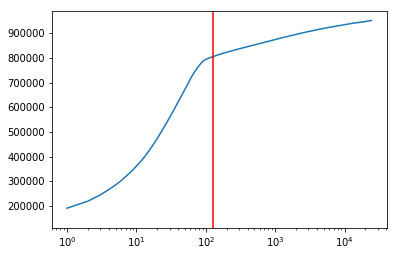

In [207]:
plt.semilogx(cs)
plt.axvline(10**2.1, c='red')
pass

In [208]:
barcodes = [seq for seq in c if c[seq] > 10**2.1]

In [209]:
len(barcodes)

263

In [210]:
sorted(barcodes)[:10]

['AAAAAAAA',
 'AAAACCGC',
 'AAAGTCGA',
 'AAATGGAA',
 'AACTGATC',
 'AACTGCGA',
 'AAGAAAGA',
 'AAGAACGA',
 'AAGACAGA',
 'AAGACATC']

In [211]:
import editdistance

In [212]:
np.unique(lev_similarity)

array([-8, -7, -6, -5, -4, -3, -2, -1,  0])

In [213]:
barcodes[:5]

['TGTACCGA', 'TAGACCGA', 'ATTCGATC', 'CGGATTCA', 'GCTTGTCA']

In [214]:
hits = []
for i, b1 in enumerate(barcodes):
    group = set([b1])
    for j, b2 in enumerate(barcodes):
        if j <= i: 
            continue
        d = editdistance.eval(b1, b2)
        if d <= 2:
            group.add(b2)
    hits.append(group)

In [215]:
seen = set([])
for hit in hits:
    s = sorted(hit)[0]
    if s.count('A') <6 and s.count('T') <= 6:
        seen.add(s)

In [216]:
seen = sorted(seen)

In [217]:
len(seen)

113

In [218]:
hits = []
for barcode in seen:
    hits.append((barcode, c[barcode]))

In [219]:
true_barcodes = [
 'CATCACGC',
 'GTCGTCGC',
 'ACGACCGC',
 'TGATGCGC',
 'CATCAATC',
 'GTCGTATC',
 'ACGACATC',
 'TGATGATC',
 'CATCATCC',
 'GTCGTTCC',
 'ACGACTCC',
 'TGATGTCC',
 'CATCAGAA',
 'GTCGTGAA',
 'ACGACGAA',
 'TGATGGAA',
 'TCACACGC',
 'CGTGTCGC',
 'GACACCGC',
 'ATGTGCGC',
 'TCACATCA',
 'CGTGTTCA',
 'GACACTCA',
 'ATGTGTCA',
 'TCACAGAG',
 'CGTGTGAG',
 'GACACGAG',
 'ATGTGGAG',
 'CTAACCGC',
 'GCTTGCGC',
 'AGCCACGC',
 'TAGGTCGC',
 'CTAACTCA',
 'GCTTGTCA',
 'AGCCATCA',
 'TAGGTTCA',
 'CTAACGAG',
 'GCTTGGAG',
 'AGCCAGAG',
 'TAGGTGAG',
 'GAATCCGA',
 'ATTCGCGA',
 'TCCGACGA',
 'CGGATCGA',
 'GAATCATC',
 'ATTCGATC',
 'TCCGAATC',
 'CGGATATC',
 'GAATCTCG',
 'ATTCGTCG',
 'TCCGATCG',
 'CGGATTCG',
 'GAATCGAT',
 'ATTCGGAT',
 'TCCGAGAT',
 'CGGATGAT',
 'AGCGTCGA',
 'TAGACCGA',
 'CTATGCGA',
 'GCTCACGA',
 'AGCGTATC',
 'TAGACATC',
 'CTATGATC',
 'GCTCAATC',
 'AGCGTTCG',
 'TAGACTCG',
 'CTATGTCG',
 'GCTCATCG',
 'AGCGTGAT',
 'TAGACGAT',
 'CTATGGAT',
 'GCTCAGAT',
 'ACTGACGA',
 'TGCATCGA',
 'CAGTCCGA',
 'GTACGCGA',
 'ACTGAATC',
 'TGCATATC',
 'CAGTCATC',
 'GTACGATC',
 'ACTGATCG',
 'TGCATTCG',
 'CAGTCTCG',
 'GTACGTCG',
 'ACTGAGAT',
 'TGCATGAT',
 'CAGTCGAT',
 'GTACGGAT',
 'TGTACCGA',
 'CACTGCGA',
 'GTGCACGA',
 'ACAGTCGA',
 'TGTACATC',
 'CACTGATC',
 'GTGCAATC',
 'ACAGTATC']

In [221]:
sorted(true_barcodes)

['ACAGTATC',
 'ACAGTCGA',
 'ACGACATC',
 'ACGACCGC',
 'ACGACGAA',
 'ACGACTCC',
 'ACTGAATC',
 'ACTGACGA',
 'ACTGAGAT',
 'ACTGATCG',
 'AGCCACGC',
 'AGCCAGAG',
 'AGCCATCA',
 'AGCGTATC',
 'AGCGTCGA',
 'AGCGTGAT',
 'AGCGTTCG',
 'ATGTGCGC',
 'ATGTGGAG',
 'ATGTGTCA',
 'ATTCGATC',
 'ATTCGCGA',
 'ATTCGGAT',
 'ATTCGTCG',
 'CACTGATC',
 'CACTGCGA',
 'CAGTCATC',
 'CAGTCCGA',
 'CAGTCGAT',
 'CAGTCTCG',
 'CATCAATC',
 'CATCACGC',
 'CATCAGAA',
 'CATCATCC',
 'CGGATATC',
 'CGGATCGA',
 'CGGATGAT',
 'CGGATTCG',
 'CGTGTCGC',
 'CGTGTGAG',
 'CGTGTTCA',
 'CTAACCGC',
 'CTAACGAG',
 'CTAACTCA',
 'CTATGATC',
 'CTATGCGA',
 'CTATGGAT',
 'CTATGTCG',
 'GAATCATC',
 'GAATCCGA',
 'GAATCGAT',
 'GAATCTCG',
 'GACACCGC',
 'GACACGAG',
 'GACACTCA',
 'GCTCAATC',
 'GCTCACGA',
 'GCTCAGAT',
 'GCTCATCG',
 'GCTTGCGC',
 'GCTTGGAG',
 'GCTTGTCA',
 'GTACGATC',
 'GTACGCGA',
 'GTACGGAT',
 'GTACGTCG',
 'GTCGTATC',
 'GTCGTCGC',
 'GTCGTGAA',
 'GTCGTTCC',
 'GTGCAATC',
 'GTGCACGA',
 'TAGACATC',
 'TAGACCGA',
 'TAGACGAT',
 'TAGACTCG',
 'TAGGTCGC',

In [223]:
k = 0
for i, x in enumerate(sorted(hits, key=lambda x: x[1], reverse=True)):
    s = 'FP'
    for bc in true_barcodes:
        if editdistance.eval(bc, x[0]) <= 1:
            s = 'TP'
            k += 1
            break
    print('%03d' % i, x[0], '%5d' % x[1], s)
print("Number of TP found: %d" % k)

000 TAGACATC 10572 TP
001 GCTCACGA  7028 TP
002 GTACGATC  6940 TP
003 CTATGATC  5861 TP
004 CAGTCATC  5609 TP
005 CAGTCTCG  5185 TP
006 GCTTGTCA  4486 TP
007 ACTGAGAT  4383 TP
008 CGTGTGAG  4340 TP
009 CGTGTTCA  3821 TP
010 ACAGTATC  3524 TP
011 GCTTGCGC  3303 TP
012 TCACACGC  3165 TP
013 ATTCGTCG  2815 TP
014 TCACATCA  2738 TP
015 CGTGTCGC  2265 TP
016 ACGACATC  2230 TP
017 ATGTGCGC  2140 TP
018 CTATGCGA  2006 TP
019 GCTTGGAG  1842 TP
020 CAGTCCGA  1698 TP
021 CACTTGAC   924 FP
022 GATCAATC   757 TP
023 AGCGTGAT   695 TP
024 AAGACAGA   664 FP
025 GTACGGAA   642 TP
026 AAGAACGA   621 FP
027 GTAAGCGA   523 TP
028 AGCGTTCG   514 TP
029 GAATAATC   465 TP
030 TACGACGA   457 TP
031 ATTAGATC   440 TP
032 GTGCAAGA   372 TP
033 AATCAATC   363 TP
034 AACTGCGA   350 TP
035 AGCAAGAG   334 TP
036 ACTGAATC   333 TP
037 ACAGACGA   330 TP
038 ATTAGCGA   319 TP
039 GTGCACAC   308 FP
040 GTACGAAT   304 TP
041 AAAGTCGA   298 TP
042 AACTGATC   287 TP
043 AGGATTCG   282 TP
044 CATAAATC   281 TP
045 GAATGG

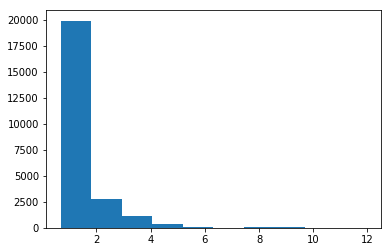

In [20]:
plt.hist(np.log1p(counts), bins=10)
pass

In [21]:
from sklearn.neighbors.kde import KernelDensity

In [55]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(counts.reshape(-1, 1))

In [56]:
xp = np.linspace(0, 12, 1000).reshape(-1,1)

In [57]:
log_dens = kde.score_samples(xp)

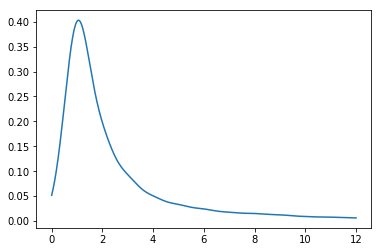

In [59]:
plt.plot(xp, np.exp(log_dens))
pass